## Week 3 Tutorial: Multiple Linear Regression

### Exercise 1
* Use *load_data(DATASET_PATH)* to create a pandas object **life_expectancy_raw**
* Use head() to preview **life_expectancy_raw**
* Create a pandas dataframe **life_expectancy** containing the following features: **Lifeexpectancy, AdultMortality, Alcohol, HepatitisB, Polio, Population, thinness5-9years, BMI, Diphtheria, GDP**

In [5]:
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import *

import numpy as np
from sklearn.metrics import mean_squared_error

def load_data(DATASET_PATH):
    return pd.read_csv(DATASET_PATH)

In [6]:
DATASET_PATH = './led.csv'

#create pandas object: life_expectancy_raw
life_expectancy_raw = load_data(DATASET_PATH)

In [9]:
#use head() to preview life_expectancy_raw
life_expectancy_raw.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
#create pandas dataframe of chosen features. 
#You can view all the features using: life_expectancy_raw.columns

life_expectancy = life_expectancy_raw.filter(["Lifeexpectancy","AdultMortality", "Alcohol", "HepatitisB", "Polio", "Population", "thinness5-9years", "BMI", "Diphtheria", "GDP"])
life_expectancy.head()
print(type(life_expectancy))

<class 'pandas.core.frame.DataFrame'>


### Exercise 2

*  Use **check_NaN()** to check **life_expectancy** for NaN values. 
* Write a function **fillNaN_median(dataframe, key)** and use it to fill all cells containing NaN values with the median value of the column (key), e.g. if NaN exists in a Lifeexpectancy cell, fill it with the median of all the life expectancy values. 
* Ensure all NaN values have been replaced, by using **check_NaN()** again. 

In [14]:
def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

In [16]:
#check for NaN values
check_NaN(life_expectancy)

Total NaN: 1973
NaN by column:
 Lifeexpectancy       10
AdultMortality       10
Alcohol             194
HepatitisB          553
Polio                19
Population          652
thinness5-9years     34
BMI                  34
Diphtheria           19
GDP                 448
dtype: int64


In [20]:
#function fill_NaN(dataframe, key)
def fill_NaN(dataframe, key): 
    median = dataframe[key].median()

    if dataframe[key].isnull().values.any():
        dataframe = dataframe[key].fillna(median, inplace= True)

for col in life_expectancy:
    # print(col)
    fill_NaN(life_expectancy, col)

In [22]:
#check (again) for NaN values
check_NaN(life_expectancy)

Total NaN: 0
NaN by column:
 Lifeexpectancy      0
AdultMortality      0
Alcohol             0
HepatitisB          0
Polio               0
Population          0
thinness5-9years    0
BMI                 0
Diphtheria          0
GDP                 0
dtype: int64


### Exercise 3

* Use **one_hot_encode** to one hot encode the 'Status' feature
* Use scikit's **train_test_split** to create the variables **x_train, x_test, y_train, y_test** (remember that the independent variable is **Lifeexpectancy**)
* Convert **x_train, x_test, y_train, y_test** from dataframes to np arrays

In [24]:
def one_hot_encode(dataframe, col_name):
    dataframe = pd.get_dummies(dataframe, columns=[col_name], prefix = [col_name])
    return dataframe

In [56]:
#one hot encode the Status feature 
#(the column indicating whether the country is developed or developing)
from sklearn.preprocessing import OneHotEncoder
a = OneHotEncoder()
b = a.fit_transform(one_hot_encode(life_expectancy_raw, "Status"))

b.toarray()


array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [92]:
#create the train/test split
from sklearn.model_selection import train_test_split

x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(life_expectancy.drop(['Lifeexpectancy'], axis=1), life_expectancy['Lifeexpectancy'],test_size=0.2, random_state=42)
print(x_train_set.shape, y_train_set.shape)

(2350, 9) (2350,)


In [94]:
#convert the dataframes/series to np arrays
type(train_set)
X = x_train_set.values
y = y_train_set.values
type(training)


numpy.ndarray

### Exercise 4
* Create a linear regression model
* Fit the training sets
* Predict the life expectancy of all countries in the test set

In [102]:
#create a linear regression model: lin_reg_model
from sklearn.linear_model import LinearRegression
#train the model 
reg_model = LinearRegression()

reg_model.fit(X, y)
reg.score(X, y)

0.6939374397097524

In [112]:
#predict by passing the test x dataset into the model
test_x, test_y = x_test_set.values, y_test_set.values

prediction = reg_model.predict(test_x)

In [116]:
#calculate the mean squared error
np.mean((prediction - test_y) **2)

25.18687323876787

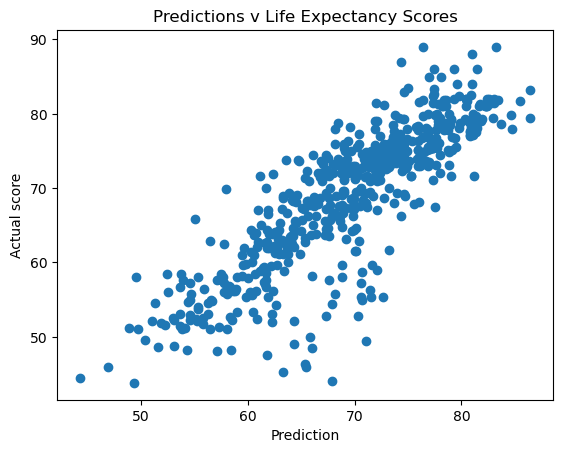

In [122]:
#use matplotlib to plot the actual life expectancy values from the test set against the predicted values
import matplotlib.pyplot as plt

plt.scatter(reg_model.predict(test_x), test_y)
plt.title("Predictions v Life Expectancy Scores")
plt.xlabel("Prediction")
plt.ylabel("Actual score")

plt.show()

### Exercise 5
* Use **get_test_countries()** to preview the countries in the test set, and their associated life expectancies
* Choose one of the countries from the list and pass its index value into the model
* Compare the actual life expectancy value to the predicted value. How accurate is it?

In [138]:
def get_test_countries(dataframe_raw, dataframe_test):
    indices = np.asarray(dataframe_test.index)
    countries = []
    for index in indices:
        countries.append([index, dataframe_raw.loc[index][0],dataframe_raw.loc[index][1], dataframe_raw.loc[index][3]])
    return countries

In [156]:
#use get_test_countries to show which countries/years are in the test set
countries = get_test_countries(life_expectancy_raw, x_test_set)
countries


/var/folders/_w/dyc83mgj39g824kzq8c4hc9w0000gn/T/ipykernel_36932/1133814238.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  countries.append([index, dataframe_raw.loc[index][0],dataframe_raw.loc[index][1], dataframe_raw.loc[index][3]])


[[2546, 'SyrianArabRepublic', 2006, 73.7],
 [650, 'Croatia', 2006, 75.9],
 [1740, 'Montenegro', 2007, 74.2],
 [177, 'Bahrain', 2014, 76.8],
 [1377, 'Kenya', 2000, 51.9],
 [535, 'Chad', 2008, 49.6],
 [2371, 'SolomonIslands', 2005, 67.4],
 [2014, 'Peru', 2008, 73.9],
 [321, 'BosniaandHerzegovina', 2014, 77.2],
 [2493, 'Swaziland', 2011, 55.0],
 [495, 'Cameroon', 2000, 51.4],
 [432, "Côted'Ivoire", 2015, 53.3],
 [1078, 'Guinea', 2011, 58.1],
 [1611, 'Maldives', 2006, 75.0],
 [2828, 'Uzbekistan', 2013, 69.1],
 [1128, 'Haiti', 2009, 62.5],
 [1569, 'Madagascar', 2000, 57.9],
 [1005, 'Germany', 2004, 79.1],
 [785, 'DominicanRepublic', 2000, 72.0],
 [1924, 'Norway', 2001, 78.8],
 [1840, 'Netherlands', 2004, 79.2],
 [1849, 'NewZealand', 2011, 86.0],
 [1867, 'Nicaragua', 2009, 73.2],
 [1713, 'Micronesia(FederatedStatesof)', 2001, 67.2],
 [256, 'Belize', 2015, 71.0],
 [781, 'DominicanRepublic', 2004, 69.3],
 [2297, 'SierraLeone', 2015, 51.0],
 [296, 'Bhutan', 2007, 66.5],
 [1912, 'Norway', 2013, 

In [161]:
#pass the index value of your chosen country into the model:
# e.g. if the index is 2631: lin_reg_model.predict(x_test.loc[2631].values.reshape(1, -1))
reg_model.predict(x_test_set.loc[1323].values.reshape(1,-1))

array([77.33587984])

### Done! 